<a href="https://colab.research.google.com/github/Wajahat-Infinity/django_with_ML_insurancePrediction/blob/main/Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


loading dataset

In [5]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
863,36,female,19.9,0,no,northeast,5458.05
511,27,male,33.7,0,no,southeast,2498.41
54,40,female,28.7,3,no,northwest,8059.68
834,36,male,33.8,1,no,northwest,5377.46
238,19,male,29.1,0,yes,northwest,17352.68


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.duplicated().sum()

1

In [ ]:
df =df.drop_duplicates(keep='first')

In [ ]:
df.shape

(1336, 7)

Data Analysis

<ipython-input-7-3e0fdad7b341>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0], kde= False)
<ipython-input-7-3e0fdad7b341>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0], kde= False)
<ipython-input-7-3e0fdad7b341>:5: UserWarning: 

`distplot` is a deprecated 

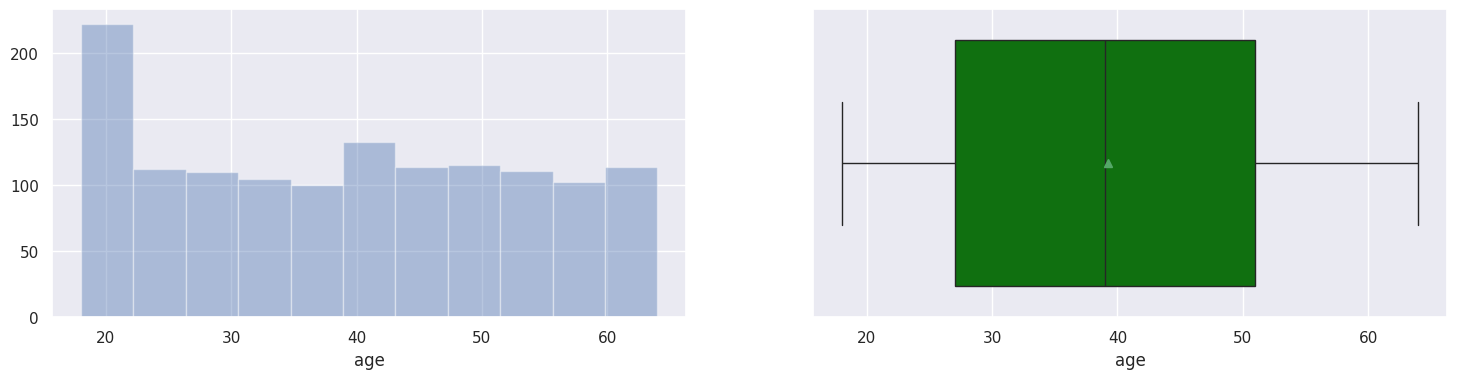

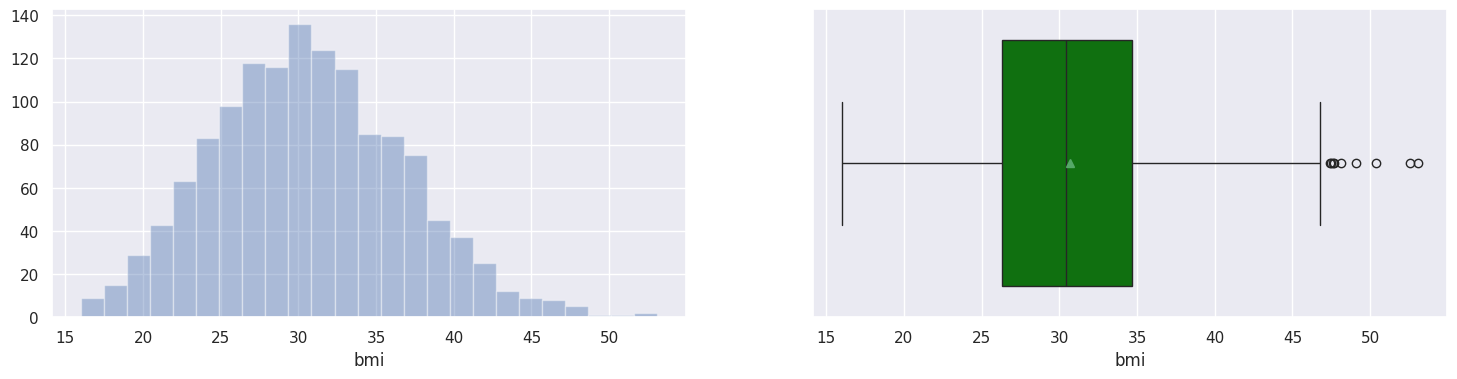

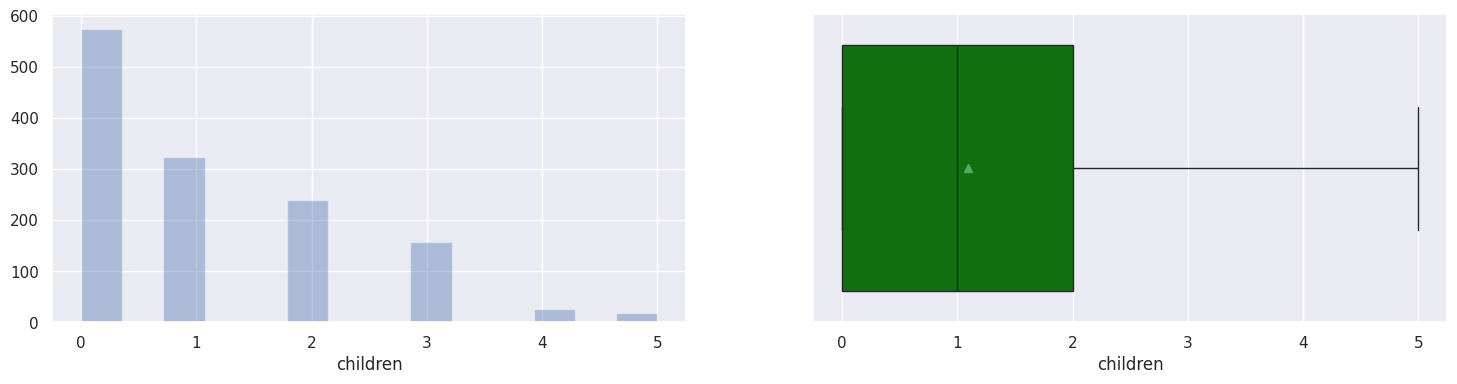

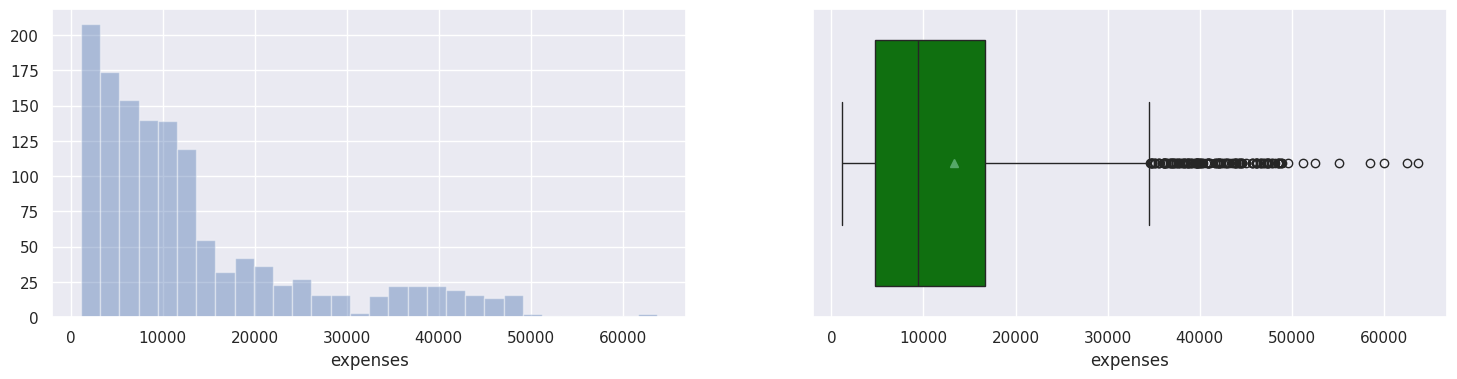

In [7]:
x_axis=['age','bmi','children','expenses']
for x in x_axis:
  sns.set_theme()
  fig, axes=plt.subplots(1,2,figsize=(18,4))
  sns.distplot(df[x],ax=axes[0], kde= False)
  sns.boxplot(df[x],ax=axes[1], orient="h", showmeans=True, color="green")


In [8]:
df['sex']=df.sex.map({'female':0,'male': 1})

In [ ]:
df.shape

(1336, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [ ]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [9]:
df['smoker']=df.smoker.map({'yes':1,'no':0})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df['region']=df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   int64  
 1   sex       1336 non-null   int64  
 2   bmi       1336 non-null   float64
 3   children  1336 non-null   int64  
 4   smoker    1336 non-null   int64  
 5   region    1336 non-null   int64  
 6   expenses  1336 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.5 KB


spliting dataset

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
#x is inputs and y is output(expenses)
x=df.drop(['expenses'],axis=1)

In [ ]:
x.sample(5)

,age,sex,bmi,children,smoker,region
548,25,0,28.6,0,0,4
827,36,1,28.0,1,1,4
16,52,0,30.8,1,0,4
1018,54,0,35.8,3,0,3
353,33,1,35.2,0,0,4


In [12]:
y=df[['expenses']]

In [ ]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape


(1068, 6)

In [ ]:
x_test.shape


(268, 6)

In [ ]:
y_train.shape


(1068, 1)

In [ ]:
y_test.shape

(268, 1)

Model Training

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_predict=lr.predict(x_test)

In [ ]:
y_predict

array([[ 8.13416893e+03],
       [ 5.44670987e+03],
       [ 1.44917516e+04],
       [ 1.02098856e+04],
       [ 2.61049501e+04],
       [ 2.59622558e+03],
       [ 4.66751909e+03],
       [ 1.40222945e+04],
       [ 1.18553019e+04],
       [ 1.14772058e+04],
       [ 1.01037894e+04],
       [ 1.36034350e+04],
       [ 3.17047502e+04],
       [ 1.69579744e+04],
       [ 3.05866231e+04],
       [ 7.87877802e+03],
       [ 1.05093205e+04],
       [ 3.24998880e+04],
       [ 1.96684962e+03],
       [ 5.34237818e+03],
       [ 3.57569104e+04],
       [ 9.11972506e+03],
       [ 1.44985213e+04],
       [ 1.35037105e+04],
       [ 3.16971907e+04],
       [ 5.55009407e+03],
       [ 1.19967405e+04],
       [ 9.21872615e+03],
       [ 1.47908078e+04],
       [ 5.10541122e+03],
       [ 1.05083197e+04],
       [ 9.45179337e+03],
       [ 1.12820429e+03],
       [ 7.07513840e+03],
       [ 1.14702443e+04],
       [ 5.19916714e+03],
       [ 4.48363477e+03],
       [ 4.05109751e+03],
       [ 1.3

In [ ]:
y_test

,expenses
900,8688.86
1064,5708.87
1256,11436.74
299,9249.50
238,17352.68
...,...
535,6067.13
543,63770.43
897,2221.56
1094,11299.34


In [19]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_predict)

In [20]:
score1

0.7833214205203848